# AMAZON

**The code includes the following:**

*Data Cleaning* – Loading and preparing actual stock price data.

*Training Models* – Forecasting Amazon stock prices using various models (LSTM, BiLSTM, Lasso Regression, Random Forest, ARIMA).

*Model Comparison* – Comparing different forecasting models based on evaluation metrics.

*Model Evaluation* – Computing and analyzing Pearson correlation, Spearman correlation, RMSE, MAE, and MAPE.

*Data Visualization* – Plotting actual vs. forecasted prices to visually assess model performance.











In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr

In [3]:
# Loading dataset
amazon_data = pd.read_csv('/content/drive/MyDrive/DATA6300/Final Project/New_Latest_Data/AMZN_raw_complete_data.csv')

<ipython-input-3-98a9aa99247e>:2: DtypeWarning: Columns (69,81,93,105,117,129,141,155,169) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_data = pd.read_csv('/content/drive/MyDrive/DATA6300/Final Project/New_Latest_Data/AMZN_raw_complete_data.csv')


In [4]:
# Filter the dataset
amazon_data['date'] = pd.to_datetime(amazon_data['date'])
amazon = amazon_data[amazon_data['date'] >= '1999-01-22']

In [5]:
# Function to calculate percentage of missing values
def null_percentage_report(df):
  null_percentage = df.isnull().sum() / len(df) * 100
  return null_percentage[null_percentage != 0]

In [6]:
null_percentage_report(amazon)

,0
sector,3.730463
exchange,3.730463
pe,3.730463
basicMaterialsChangesPercentage,100.000000
communicationServicesChangesPercentage,25.729873
...,...
tema,0.029490
williams,0.029490
wma,0.029490
AMZN_twitter_social_sentiment,99.071070


In [7]:
# Remove duplicatees
print(f"before removing: ", len(amazon))
amazon_filtered = amazon.drop_duplicates()
print(f"after removing: ", len(amazon_filtered))

before removing:  6782
after removing:  6665


In [8]:
# Filling in missing values
amazon_filtered['symbol'] = amazon_filtered['symbol'].fillna('AMZN')
amazon_filtered['sector'] = amazon_filtered['sector'].fillna('Technology')
amazon_filtered['exchange'] = amazon_filtered['exchange'].fillna('NASDAQ')

<ipython-input-8-fd8e18087fc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_filtered['symbol'] = amazon_filtered['symbol'].fillna('AMZN')
<ipython-input-8-fd8e18087fc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_filtered['sector'] = amazon_filtered['sector'].fillna('Technology')
<ipython-input-8-fd8e18087fc4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [9]:
# Filling in missing values
columns_to_fill = ['sma', 'adx', 'dema', 'ema', 'rsi', 'standardDeviation', 'tema', 'williams', 'wma', 'month1', 'month2', 'month3', 'month6', 'year1', 'year2', 'year3', 'year5', 'year7', 'year10','year20', 'year30', 'inflationRate']
amazon_filtered[columns_to_fill] = amazon_filtered[columns_to_fill].fillna(amazon_filtered[columns_to_fill].mean())

<ipython-input-9-b2dee72803d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_filtered[columns_to_fill] = amazon_filtered[columns_to_fill].fillna(amazon_filtered[columns_to_fill].mean())


In [10]:
# List of columns to drop
columns_to_drop = [
    'CADUSD_open', 'CADUSD_high', 'CADUSD_low', 'CADUSD_close', 'CADUSD_adjClose',
    'CADUSD_traded_volume', 'CADUSD_unadjusted_traded_Volume', 'CADUSD_change',
    'CADUSD_changePercent', 'CADUSD_vwap', 'CADUSD_label', 'CADUSD_changeOverTime',

    'CHFUSD_open', 'CHFUSD_high', 'CHFUSD_low', 'CHFUSD_close', 'CHFUSD_adjClose',
    'CHFUSD_traded_volume', 'CHFUSD_unadjusted_traded_Volume', 'CHFUSD_change',
    'CHFUSD_changePercent', 'CHFUSD_vwap', 'CHFUSD_label', 'CHFUSD_changeOverTime',

    'CNHUSD_open', 'CNHUSD_high', 'CNHUSD_low', 'CNHUSD_close', 'CNHUSD_adjClose',
    'CNHUSD_traded_volume', 'CNHUSD_unadjusted_traded_Volume', 'CNHUSD_change',
    'CNHUSD_changePercent', 'CNHUSD_vwap', 'CNHUSD_label', 'CNHUSD_changeOverTime',

    'KRWUSD_open', 'KRWUSD_high', 'KRWUSD_low', 'KRWUSD_close', 'KRWUSD_adjClose',
    'KRWUSD_traded_volume', 'KRWUSD_unadjusted_traded_Volume', 'KRWUSD_change',
    'KRWUSD_changePercent', 'KRWUSD_vwap', 'KRWUSD_label', 'KRWUSD_changeOverTime',

    'EURUSD_open', 'EURUSD_high', 'EURUSD_low', 'EURUSD_close', 'EURUSD_adjClose',
    'EURUSD_traded_volume', 'EURUSD_unadjusted_traded_Volume', 'EURUSD_change',
    'EURUSD_changePercent', 'EURUSD_vwap', 'EURUSD_label', 'EURUSD_changeOverTime',

    'GBPUSD_open', 'GBPUSD_high', 'GBPUSD_low', 'GBPUSD_close', 'GBPUSD_adjClose',
    'GBPUSD_traded_volume', 'GBPUSD_unadjusted_traded_Volume', 'GBPUSD_change',
    'GBPUSD_changePercent', 'GBPUSD_vwap', 'GBPUSD_label', 'GBPUSD_changeOverTime',

    'JPYUSD_open', 'JPYUSD_high', 'JPYUSD_low', 'JPYUSD_close', 'JPYUSD_adjClose',
    'JPYUSD_traded_volume', 'JPYUSD_unadjusted_traded_Volume', 'JPYUSD_change',
    'JPYUSD_changePercent', 'JPYUSD_vwap', 'JPYUSD_label', 'JPYUSD_changeOverTime',
    'NVDA_twitter_social_sentiment', 'AMZN_twitter_social_sentiment',
    'financialServicesChangesPercentage', 'basicMaterialsChangesPercentage',
    'Lithium_price', 'Lithium_open', 'Lithium_volume', 'Lithium_close'
]

# Drop the columns
amazon_filtered.drop(columns=columns_to_drop, inplace=True, errors='ignore')


<ipython-input-10-52ff39848a6a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_filtered.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [11]:
# Apply backfill to the columns
columns_to_fill = [
    'communicationServicesChangesPercentage',
    'consumerCyclicalChangesPercentage',
    'consumerDefensiveChangesPercentage',
    'energyChangesPercentage',
    'healthcareChangesPercentage',
    'industrialsChangesPercentage',
    'realEstateChangesPercentage',
    'technologyChangesPercentage',
    'utilitiesChangesPercentage',
    "inflationRate", "Palladium_price", "Palladium_volume", "Palladium_open", "Palladium_close",
    "Copper_price", "Copper_volume", "Copper_open", "Copper_close",
    "Silver_price", "Silver_volume", "Silver_open", "Silver_close",
    "Gold_price", "Gold_volume", "Gold_open", "Gold_close", "pe"
]
amazon_filtered[columns_to_fill] = amazon_filtered[columns_to_fill].bfill()

<ipython-input-11-a1b270e7746f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_filtered[columns_to_fill] = amazon_filtered[columns_to_fill].bfill()


In [12]:
null_percentage_report(amazon_filtered)

,0


In [13]:
# Function to replace invalid sentiment values
def replace_sorry_values(row):
    valid_sentiments = {'neutral', 'strongly_positive', 'weakly_positive', 'strongly_negative', 'weakly_negative'}

    def handle_sentiment(primary, secondary):
        if str(row[primary]).startswith(("i'm sorry", "i'm unable", "i am unable")):
            row[primary] = row[secondary] if str(row[secondary]).lower() not in {"i'm sorry", "i'm unable", "i am unable"} else max(row[primary], row[secondary])
        if str(row[primary]).lower() not in valid_sentiments and str(row[secondary]).lower() in valid_sentiments:
            row[primary] = row[secondary]

    handle_sentiment('NVDA_stock_news_sentiment', 'NVDA_press_release_sentiment')
    handle_sentiment('NVDA_press_release_sentiment', 'NVDA_stock_news_sentiment')
    handle_sentiment('AMZN_stock_news_sentiment', 'AMZN_press_release_sentiment')
    handle_sentiment('AMZN_press_release_sentiment', 'AMZN_stock_news_sentiment')

    return row

amazon_filtered = amazon_filtered.apply(replace_sorry_values, axis=1)


## Data Transformation

In [14]:
# Checking which featutres are numerical
num_cols = list(amazon_filtered.select_dtypes(include = ['int64', 'float64']).columns)
num_cols

['AMZN_close',
 'AMZN_high',
 'AMZN_low',
 'AMZN_open',
 'AMZN_traded_volume',
 'AMZN_adjClose',
 'AMZN_adjLow',
 'AMZN_adjOpen',
 'AMZN_adj_traded_volume',
 'AMZN_divCash',
 'AMZN_splitFactor',
 'pe',
 'communicationServicesChangesPercentage',
 'consumerCyclicalChangesPercentage',
 'consumerDefensiveChangesPercentage',
 'energyChangesPercentage',
 'healthcareChangesPercentage',
 'industrialsChangesPercentage',
 'realEstateChangesPercentage',
 'technologyChangesPercentage',
 'utilitiesChangesPercentage',
 'month1',
 'month2',
 'month3',
 'month6',
 'year1',
 'year2',
 'year3',
 'year5',
 'year7',
 'year10',
 'year20',
 'year30',
 'inflationRate',
 'Palladium_price',
 'Palladium_volume',
 'Palladium_open',
 'Palladium_close',
 'Copper_price',
 'Copper_volume',
 'Copper_open',
 'Copper_close',
 'Silver_price',
 'Silver_volume',
 'Silver_open',
 'Silver_close',
 'Gold_price',
 'Gold_volume',
 'Gold_open',
 'Gold_close',
 'sma',
 'adx',
 'dema',
 'ema',
 'rsi',
 'standardDeviation',
 'tema

In [15]:
# Dropping irrelevant columns
columns_to_drop = ['sector', 'exchange', 'symbol']
amazon_filtered = amazon_filtered.drop(columns_to_drop, axis=1)

In [16]:
# Checking which features are categorical
ohe_cols = list(amazon_filtered.select_dtypes(include = ["category", "object"]).columns)
ohe_cols

['AMZN_stock_news_sentiment',
 'AMZN_press_release_sentiment',
 'NVDA_stock_news_sentiment',
 'NVDA_press_release_sentiment']

In [17]:
# List of columns to apply one-hot encoding
columns_to_encode = [
    'AMZN_stock_news_sentiment',
    'AMZN_press_release_sentiment',
    'NVDA_stock_news_sentiment',
    'NVDA_press_release_sentiment'
]

# Use get_dummies to one-hot encode the specified columns
amazon_filtered = pd.get_dummies(amazon_filtered, columns=columns_to_encode, drop_first=True)

In [18]:
# Checking which features are categorical
all_columns = list(amazon_filtered.columns)
all_columns

['date',
 'AMZN_close',
 'AMZN_high',
 'AMZN_low',
 'AMZN_open',
 'AMZN_traded_volume',
 'AMZN_adjClose',
 'AMZN_adjLow',
 'AMZN_adjOpen',
 'AMZN_adj_traded_volume',
 'AMZN_divCash',
 'AMZN_splitFactor',
 'pe',
 'communicationServicesChangesPercentage',
 'consumerCyclicalChangesPercentage',
 'consumerDefensiveChangesPercentage',
 'energyChangesPercentage',
 'healthcareChangesPercentage',
 'industrialsChangesPercentage',
 'realEstateChangesPercentage',
 'technologyChangesPercentage',
 'utilitiesChangesPercentage',
 'month1',
 'month2',
 'month3',
 'month6',
 'year1',
 'year2',
 'year3',
 'year5',
 'year7',
 'year10',
 'year20',
 'year30',
 'inflationRate',
 'Palladium_price',
 'Palladium_volume',
 'Palladium_open',
 'Palladium_close',
 'Copper_price',
 'Copper_volume',
 'Copper_open',
 'Copper_close',
 'Silver_price',
 'Silver_volume',
 'Silver_open',
 'Silver_close',
 'Gold_price',
 'Gold_volume',
 'Gold_open',
 'Gold_close',
 'sma',
 'adx',
 'dema',
 'ema',
 'rsi',
 'standardDeviation

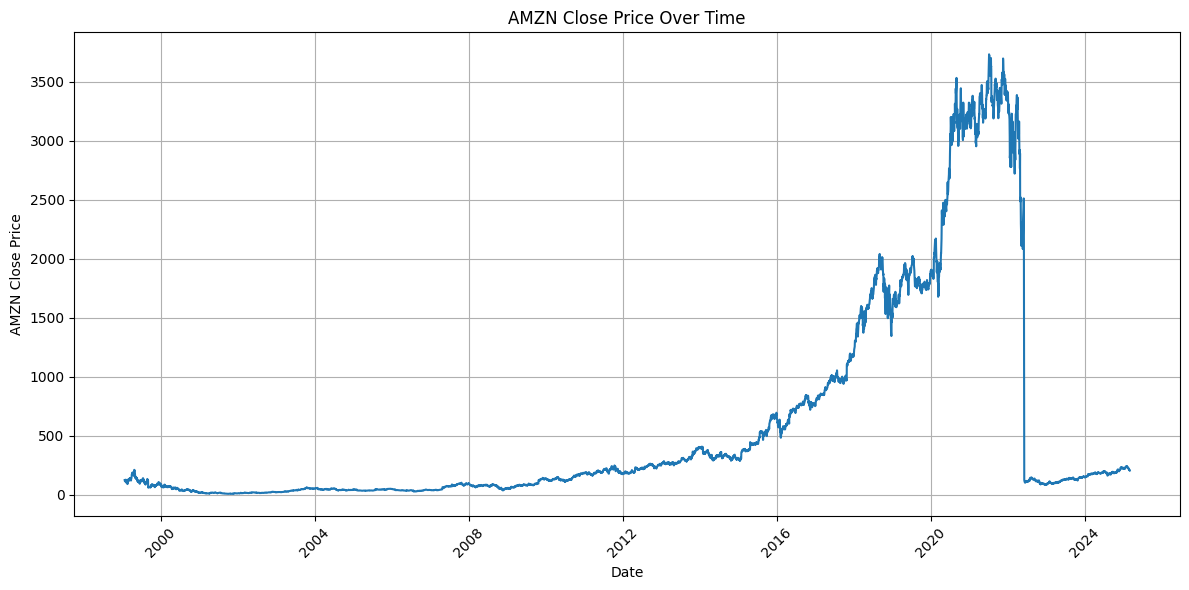

In [19]:
# Plot for closing price of Amazon (AMZN) over time
plt.figure(figsize=(12, 6))
plt.plot(amazon_filtered['date'], amazon_filtered['AMZN_close'])
plt.xlabel('Date')
plt.ylabel('AMZN Close Price')
plt.title('AMZN Close Price Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Save the updated DataFrame to CSV
amazon_filtered.to_csv('amazon_filtered.csv', index=False)

## LSTM

          date  AMZN_close  AMZN_high  AMZN_low  AMZN_open  \
430 1999-01-22       123.0      125.9     98.75      99.13   
431 1999-01-25       112.4      123.4    110.00     121.50   
432 1999-01-26       115.1      121.3    110.60     112.60   
433 1999-01-27       125.6      139.8    120.10     134.00   
434 1999-01-28       122.9      128.8    120.30     126.40   

     AMZN_traded_volume  AMZN_adjClose  AMZN_adjLow  AMZN_adjOpen  \
430            21882900         3.0750      2.46875       2.47825   
431            13661900         2.8100      2.75000       3.03750   
432            12267400         2.8775      2.76500       2.81500   
433            17511300         3.1400      3.00250       3.35000   
434            11875300         3.0725      3.00750       3.16000   

     AMZN_adj_traded_volume  AMZN_divCash  AMZN_splitFactor         pe  \
430               875316000           0.0               1.0  75.925539   
431               546476000           0.0               1.0  75.

<ipython-input-31-e7034eccdd93>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-31-e7034eccdd93>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['date'].dt.dayofweek
<ipython-input-31-e7034eccdd93>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 2.7359e-04 - val_loss: 0.0020
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 2.5308e-04 - val_loss: 0.0030
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 2.1371e-04 - val_loss: 0.0018
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 2.1769e-04 - val_loss: 0.0018
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.7492e-04 - val_loss: 0.0019
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 2.0497e-04 - val_loss: 0.0023
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 2.1028e-04 - val_loss: 0.0016
Epoch 9/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 2.0520e-04 - val_loss: 0.0024
Epoch 10/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 1.6647e-04 - val_loss: 0.0017
Epoch 11/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 1.9029e-04 - val_loss: 0.0021
Epo

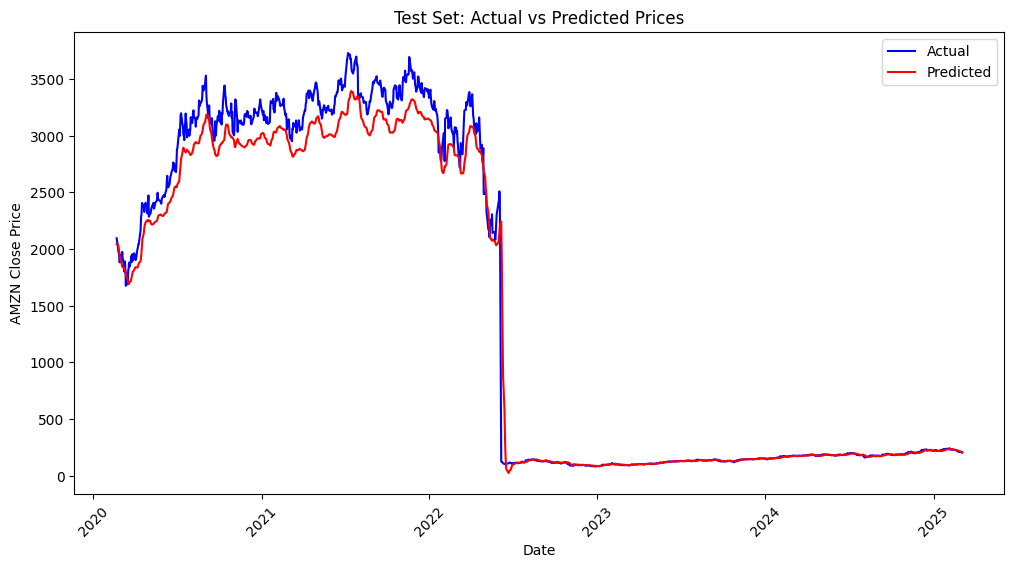

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


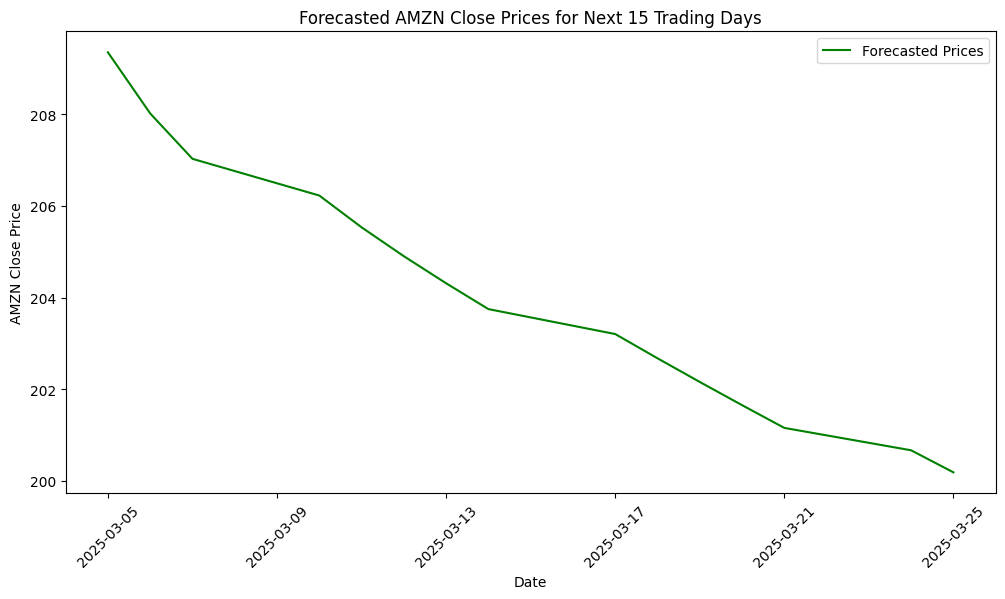

In [31]:
np.random.seed(42)
data_amazon = amazon_filtered.copy()
data = data_amazon.loc[:, ~data_amazon.columns.str.contains('NVDA')]
data['date'] = pd.to_datetime(data['date'])

# Extract date-related features
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['quarter'] = data['date'].dt.quarter
data['year'] = data['date'].dt.year
data['date_unix'] = data['date'].astype('int64') // 10**9

# Scale the entire data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['AMZN_close']])
data['AMZN_close_scaled'] = data_scaled

# Split data into train and test
split_date = np.quantile(data['date_unix'], 0.8)
train_data = data[data['date_unix'] <= split_date]
test_data = data[data['date_unix'] > split_date]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60

train_scaled = train_data[['AMZN_close_scaled']].values
test_scaled = test_data[['AMZN_close_scaled']].values

X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
sns.lineplot(x=test_data['date'].iloc[seq_length:], y=y_test.flatten(), label='Actual', color='blue')
sns.lineplot(x=test_data['date'].iloc[seq_length:], y=y_pred.flatten(), label='Predicted', color='red')
plt.xlabel("Date")
plt.ylabel("AMZN Close Price")
plt.title("Test Set: Actual vs Predicted Prices")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Forecast the next 14 days
future_predictions = []
input_seq = X_test[-1].reshape(1, seq_length, 1)

for _ in range(15):
    pred = model.predict(input_seq)[0, 0]
    future_predictions.append(pred)
    new_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)
    input_seq = new_seq

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
date_range = pd.date_range(start=pd.to_datetime(test_data['date'].max()) + pd.Timedelta(days=1), periods=15, freq='B')

# Plot forecasted prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=date_range, y=future_predictions, label='Forecasted Prices', color='green')
plt.xlabel("Date")
plt.ylabel("AMZN Close Price")
plt.title("Forecasted AMZN Close Prices for Next 15 Trading Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [32]:
# Create a DataFrame for LSTM forecasted prices and save it as a CSV file.
lstm_amazon_forecast = pd.DataFrame({'Date': date_range, 'Forecasted Close Price': future_predictions})
print(lstm_amazon_forecast)
lstm_amazon_forecast.to_csv('lstm_amazon_forecast.csv', index=False)

         Date  Forecasted Close Price
0  2025-03-05              209.346466
1  2025-03-06              208.013840
2  2025-03-07              207.024307
3  2025-03-10              206.224213
4  2025-03-11              205.531204
5  2025-03-12              204.901367
6  2025-03-13              204.311111
7  2025-03-14              203.747665
8  2025-03-17              203.203827
9  2025-03-18              202.675186
10 2025-03-19              202.159088
11 2025-03-20              201.653519
12 2025-03-21              201.157166
13 2025-03-24              200.668915
14 2025-03-25              200.187927


## BiLSTM

<ipython-input-20-502924eef6de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-20-502924eef6de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['date'].dt.dayofweek
<ipython-input-20-502924eef6de>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - loss: 0.0023 - val_loss: 0.0060
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - loss: 3.7487e-04 - val_loss: 0.0050
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - loss: 2.7734e-04 - val_loss: 0.0043
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - loss: 2.4805e-04 - val_loss: 0.0050
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - loss: 2.4692e-04 - val_loss: 0.0042
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 40s 123ms/step - loss: 1.9485e-04 - val_loss: 0.0040
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - loss: 2.2687e-04 - val_loss: 0.0045
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - loss: 2.1918e-04 - val_loss: 0.0038
Epoch 9/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - loss: 2.0906e-04 - val_loss: 0.0029
Epoch 10/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - loss: 1.8965e-04 - val_loss: 0.0042
Epoch 11/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - loss: 2.4269e-0

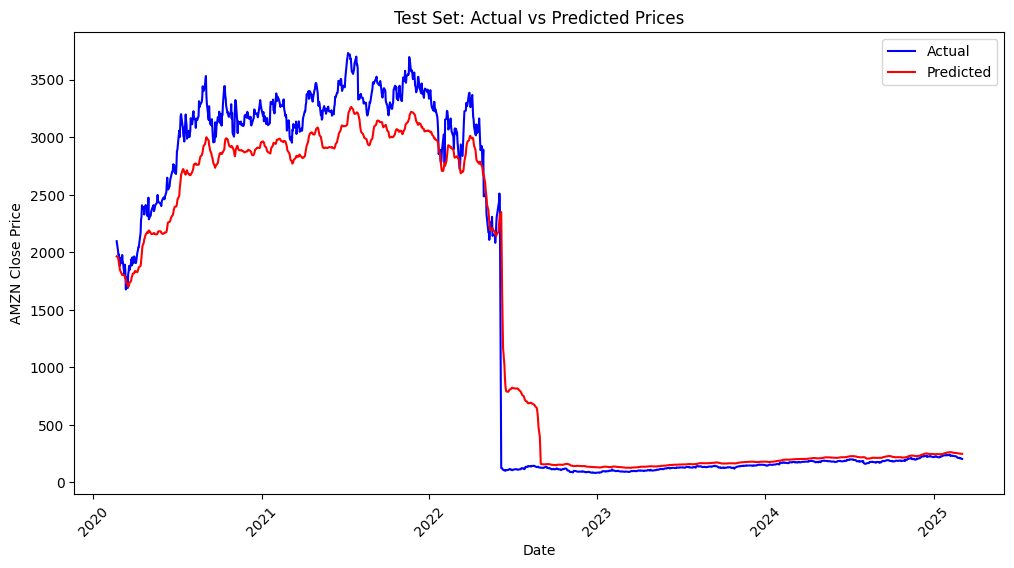

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


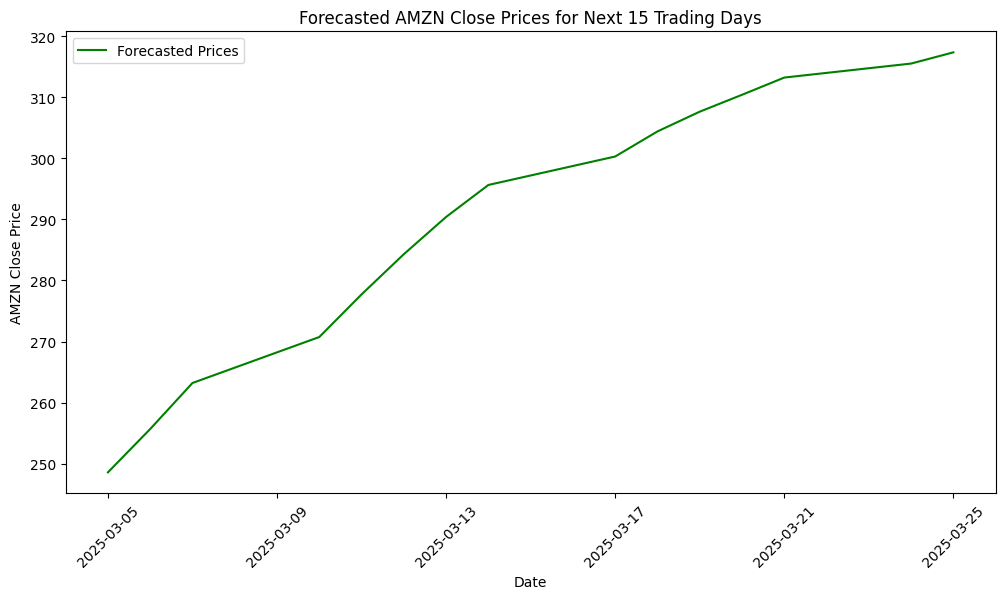

In [20]:
np.random.seed(42)
data_amazon = amazon_filtered.copy()
data = data_amazon.loc[:, ~data_amazon.columns.str.contains('NVDA')]
data['date'] = pd.to_datetime(data['date'])

# Extract date-related features
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['quarter'] = data['date'].dt.quarter
data['year'] = data['date'].dt.year
data['date_unix'] = data['date'].astype('int64') // 10**9

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['AMZN_close']])
data['AMZN_close_scaled'] = data_scaled

split_date = np.quantile(data['date_unix'], 0.8)
train_data = data[data['date_unix'] <= split_date]
test_data = data[data['date_unix'] > split_date]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60

train_scaled = train_data[['AMZN_close_scaled']].values
test_scaled = test_data[['AMZN_close_scaled']].values

X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define Bidirectional LSTM Model
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(seq_length, 1)),
    Dropout(0.3),
    Bidirectional(LSTM(50, return_sequences=False)),
    Dropout(0.3),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
sns.lineplot(x=test_data['date'].iloc[seq_length:], y=y_test.flatten(), label='Actual', color='blue')
sns.lineplot(x=test_data['date'].iloc[seq_length:], y=y_pred.flatten(), label='Predicted', color='red')
plt.xlabel("Date")
plt.ylabel("AMZN Close Price")
plt.title("Test Set: Actual vs Predicted Prices")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Forecast the next 14 days
future_predictions = []
input_seq = X_test[-1].reshape(1, seq_length, 1)

for _ in range(15):
    pred = model.predict(input_seq)[0, 0]
    future_predictions.append(pred)
    new_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)
    input_seq = new_seq

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
date_range = pd.date_range(start=pd.to_datetime(test_data['date'].max()) + pd.Timedelta(days=1), periods=15, freq='B')

# Plot forecasted prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=date_range, y=future_predictions, label='Forecasted Prices', color='green')
plt.xlabel("Date")
plt.ylabel("AMZN Close Price")
plt.title("Forecasted AMZN Close Prices for Next 15 Trading Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [21]:
# Create a DataFrame for BiLSTM forecasted prices and save it as a CSV file.
bilstm_amazon_forecast = pd.DataFrame({'Date': date_range, 'Forecasted Close Price': future_predictions})
print(bilstm_amazon_forecast)
bilstm_amazon_forecast.to_csv('bilstm_amazon_forecast.csv', index=False)

         Date  Forecasted Close Price
0  2025-03-05              248.583954
1  2025-03-06              255.676117
2  2025-03-07              263.208984
3  2025-03-10              270.734009
4  2025-03-11              277.708710
5  2025-03-12              284.292694
6  2025-03-13              290.387390
7  2025-03-14              295.621429
8  2025-03-17              300.280762
9  2025-03-18              304.385834
10 2025-03-19              307.618073
11 2025-03-20              310.381775
12 2025-03-21              313.201416
13 2025-03-24              315.492706
14 2025-03-25              317.329071


## Lasso

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.135e+05, tolerance: 1.348e+05
  model = cd_fast.enet_coordinate_descent(


Test RMSE: 287.9024799749708


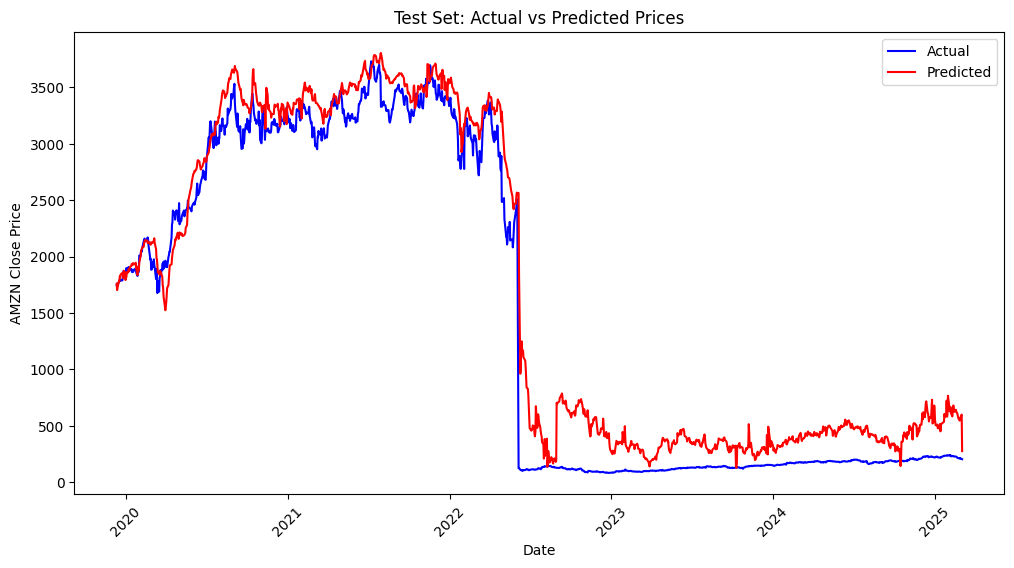

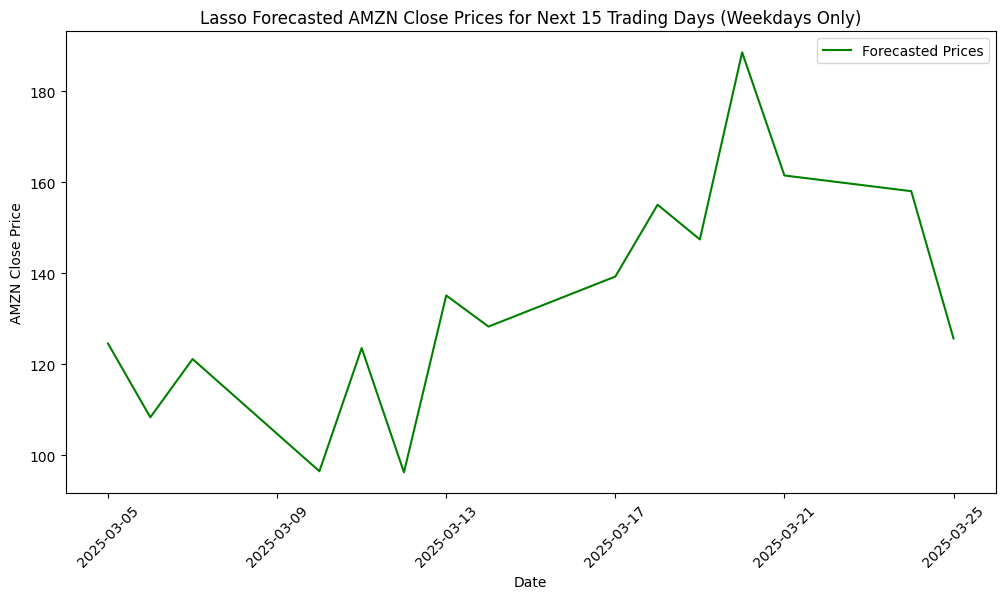

In [38]:
np.random.seed(42)
data = amazon_filtered.copy()
data = data.loc[:, ~data.columns.str.contains('NVDA')]
data = data.dropna(subset=['AMZN_close'])
data['date'] = pd.to_datetime(data['date'])
y = data['AMZN_close']
X = data.drop(columns=['date', 'AMZN_close'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=data.index)

sequence_length = 60
future_days = 15

X_seq, y_seq = [], []

for i in range(len(X_scaled_df) - sequence_length):
    X_seq.append(X_scaled_df.iloc[i:i + sequence_length].values)
    y_seq.append(y.iloc[i + sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Train-test split
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Flatten sequences for Lasso
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

alpha_value = 0.01

# Train Lasso model
lasso = Lasso(alpha=alpha_value, warm_start=True)
lasso.fit(X_train_flat, y_train)

# Compute RMSE for the test set predictions
y_pred = lasso.predict(X_test_flat)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['date'].iloc[train_size+sequence_length:], y=y_test.flatten(), label='Actual', color='blue')
sns.lineplot(x=data['date'].iloc[train_size+sequence_length:], y=y_pred.flatten(), label='Predicted', color='red')
plt.xlabel("Date")
plt.ylabel("AMZN Close Price")
plt.title("Test Set: Actual vs Predicted Prices")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Forecast next 15 trading days
last_known_sequence = X_scaled_df.iloc[-sequence_length:].values
future_predictions = []
future_dates = []
next_date = data['date'].iloc[-1]

while len(future_predictions) < future_days:
    next_date += pd.Timedelta(days=1)
    if next_date.weekday() < 5:
        input_seq = last_known_sequence.reshape(1, -1)
        pred = lasso.predict(input_seq)[0]
        future_predictions.append(pred)
        future_dates.append(next_date)
        new_row = np.roll(last_known_sequence, -1, axis=0)
        new_row[-1] = last_known_sequence[-1]
        last_known_sequence = new_row

# Plot forecasted prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=future_dates, y=future_predictions, label='Forecasted Prices', color='green')
plt.xlabel("Date")
plt.ylabel("AMZN Close Price")
plt.title("Lasso Forecasted AMZN Close Prices for Next 15 Trading Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [39]:
# Create a DataFrame for Lasso forecasted prices and save it as a CSV file.
lasso_amazon_forecast = pd.DataFrame({'Date': future_dates, 'Forecasted Close Price': future_predictions})
print(lasso_amazon_forecast)
lasso_amazon_forecast.to_csv('lasso_amazon_forecast.csv', index=False)

         Date  Forecasted Close Price
0  2025-03-05              124.577690
1  2025-03-06              108.382024
2  2025-03-07              121.184694
3  2025-03-10               96.526697
4  2025-03-11              123.603563
5  2025-03-12               96.288139
6  2025-03-13              135.153665
7  2025-03-14              128.317085
8  2025-03-17              139.307113
9  2025-03-18              155.093181
10 2025-03-19              147.467456
11 2025-03-20              188.576904
12 2025-03-21              161.519504
13 2025-03-24              158.072049
14 2025-03-25              125.722549


## Random Forest

Test RMSE: 1263.7999344395512


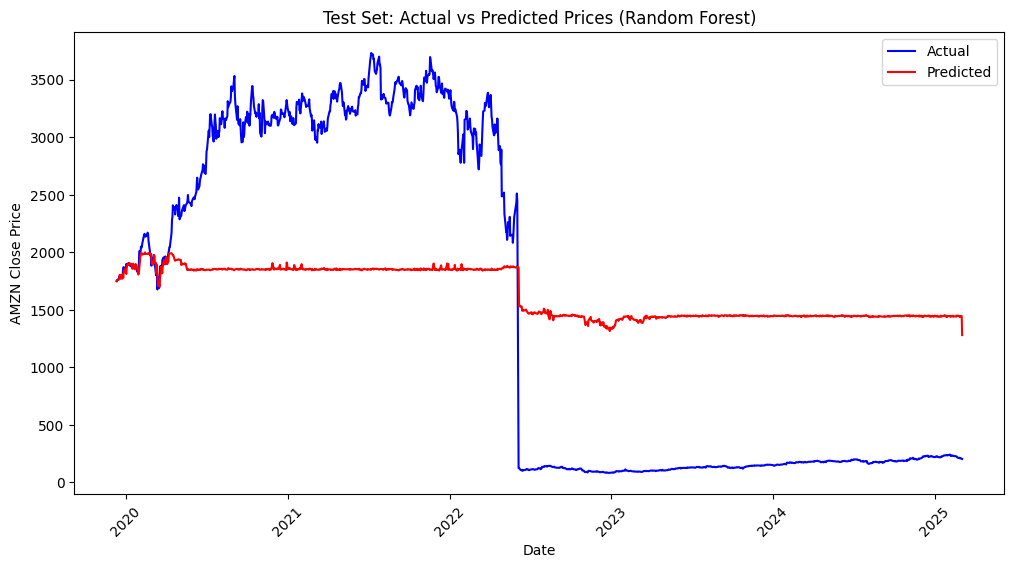

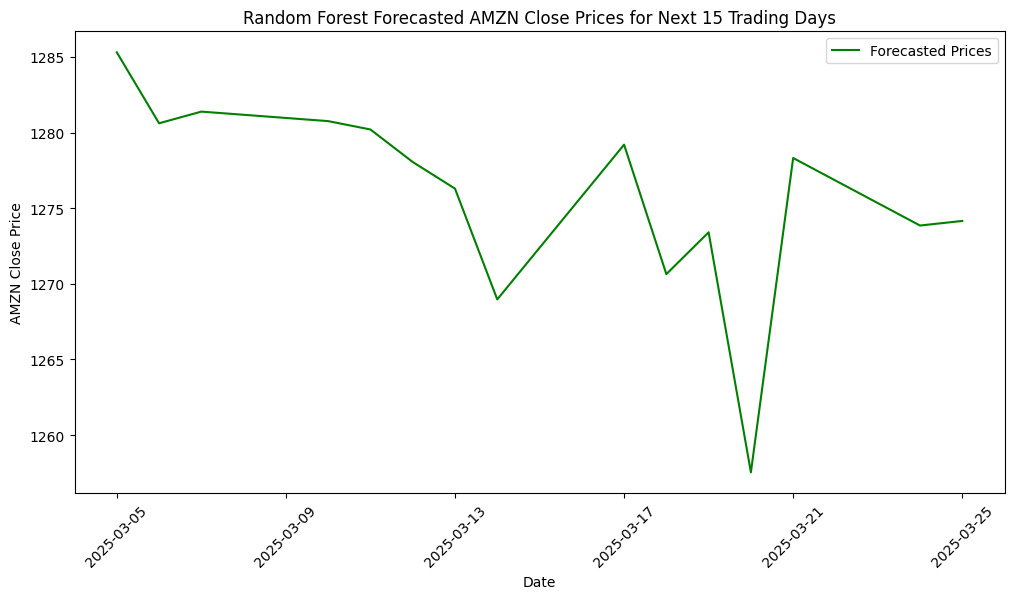

In [41]:
np.random.seed(42)
data = amazon_filtered.copy()
data = data.loc[:, ~data.columns.str.contains('NVDA')]
data = data.dropna(subset=['AMZN_close'])
data['date'] = pd.to_datetime(data['date'])
y = data['AMZN_close']
X = data.drop(columns=['date', 'AMZN_close'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=data.index)

# Define sequence length and forecast period
sequence_length = 60
future_days = 15

X_seq, y_seq = [], []

for i in range(len(X_scaled_df) - sequence_length):
    X_seq.append(X_scaled_df.iloc[i:i + sequence_length].values)
    y_seq.append(y.iloc[i + sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Train-test split
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]


X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

rf = RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_split=5,
                           min_samples_leaf=2, random_state=42, n_jobs=-1)
rf.fit(X_train_flat, y_train)

y_pred = rf.predict(X_test_flat)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')

plt.figure(figsize=(12, 6))
sns.lineplot(x=data['date'].iloc[train_size+sequence_length:], y=y_test.flatten(), label='Actual', color='blue')
sns.lineplot(x=data['date'].iloc[train_size+sequence_length:], y=y_pred.flatten(), label='Predicted', color='red')
plt.xlabel("Date")
plt.ylabel("AMZN Close Price")
plt.title("Test Set: Actual vs Predicted Prices (Random Forest)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Forecast next 15 trading days
last_known_sequence = X_scaled_df.iloc[-sequence_length:].values
future_predictions = []
future_dates = []

current_date = data['date'].iloc[-1]

while len(future_predictions) < future_days:
    current_date += pd.Timedelta(days=1)
    if current_date.weekday() < 5:
        input_seq = last_known_sequence.reshape(1, -1)
        pred = rf.predict(input_seq)[0]
        future_predictions.append(pred)
        future_dates.append(current_date)
        new_row = np.roll(last_known_sequence, -1, axis=0)
        new_row[-1] = last_known_sequence[-1]
        last_known_sequence = new_row

# Plot forecasted prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=future_dates, y=future_predictions, label='Forecasted Prices', color='green')
plt.xlabel("Date")
plt.ylabel("AMZN Close Price")
plt.title("Random Forest Forecasted AMZN Close Prices for Next 15 Trading Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [42]:
# Create a DataFrame for Random Forest forecasted prices and save it as a CSV file.
rf_amazon_forecast = pd.DataFrame({'Date': date_range, 'Forecasted Close Price': future_predictions})
print(rf_amazon_forecast)
rf_amazon_forecast.to_csv('rf_amazon_forecast.csv', index=False)

         Date  Forecasted Close Price
0  2025-03-05             1285.297849
1  2025-03-06             1280.609440
2  2025-03-07             1281.381036
3  2025-03-10             1280.752619
4  2025-03-11             1280.199494
5  2025-03-12             1278.052077
6  2025-03-13             1276.292424
7  2025-03-14             1268.970828
8  2025-03-17             1279.196465
9  2025-03-18             1270.641820
10 2025-03-19             1273.405899
11 2025-03-20             1257.541940
12 2025-03-21             1278.314182
13 2025-03-24             1273.853032
14 2025-03-25             1274.155365


## ARIMA

<ipython-input-52-262d408f9a96>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-52-262d408f9a96>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_unix'] = data['date'].astype('int64') // 10**9
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, fr

ARIMA Test RMSE: 1272.4905710421392


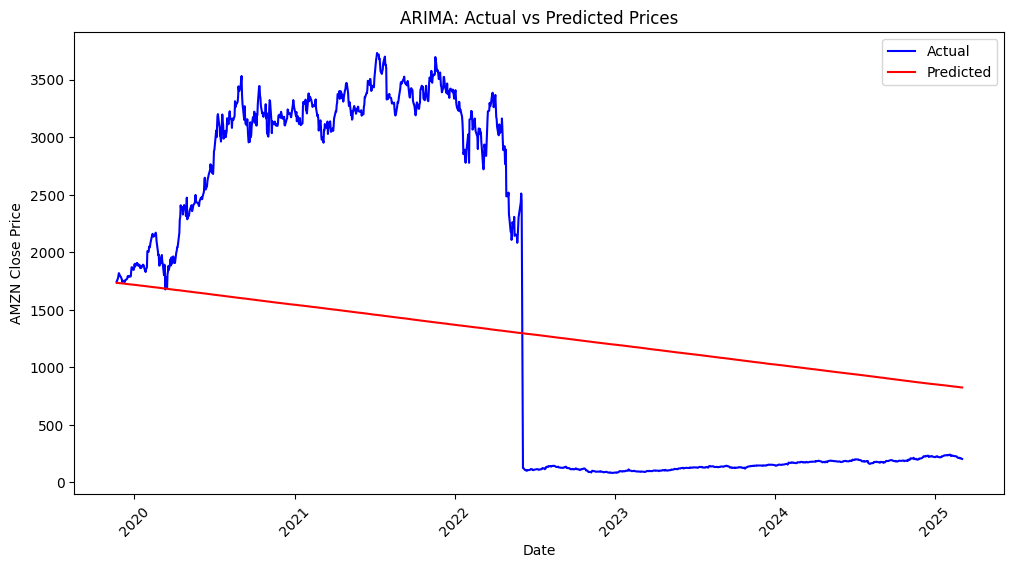

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


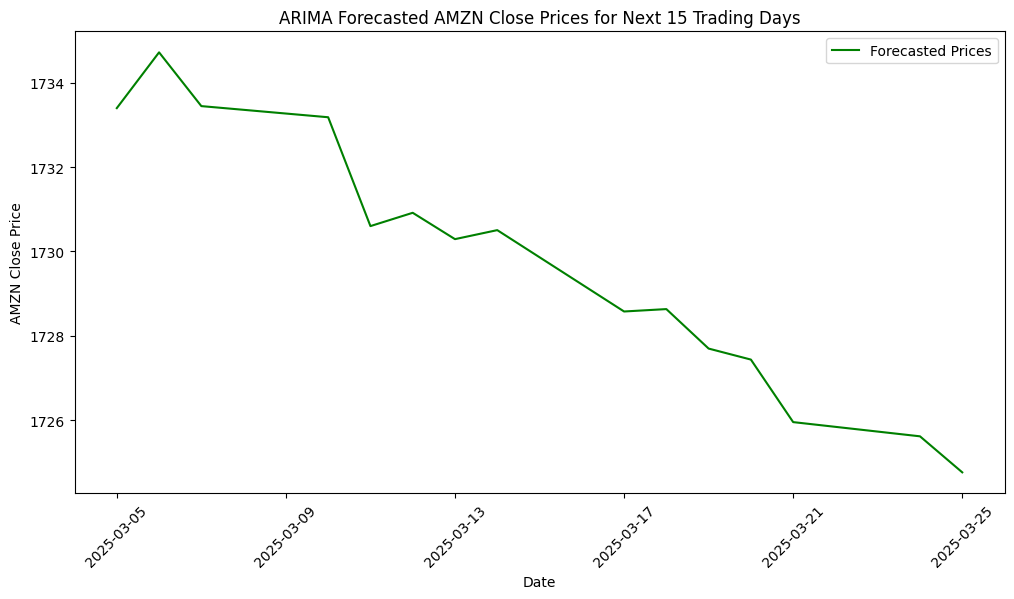

In [52]:
data_msft = amazon_filtered.copy()
data = data_msft.loc[:, ~data_msft.columns.str.contains('NVDA')]
data['date'] = pd.to_datetime(data['date'])
data['date_unix'] = data['date'].astype('int64') // 10**9

# Split data into train and test
split_date = np.quantile(data['date_unix'], 0.8)
train_data = data[data['date_unix'] <= split_date]
test_data = data[data['date_unix'] > split_date]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['AMZN_close']])
test_scaled = scaler.transform(test_data[['AMZN_close']])

train_series = pd.Series(train_scaled.flatten(), index=train_data['date'])
test_series = pd.Series(test_scaled.flatten(), index=test_data['date'])

# ARIMA Model
order = (8, 2, 9)
model_arima = ARIMA(train_series, order=order)
model_arima_fit = model_arima.fit()

# Predictions
predictions_arima_scaled = model_arima_fit.forecast(steps=len(test_series))
predictions_arima = scaler.inverse_transform(predictions_arima_scaled.values.reshape(-1, 1)).flatten()
actual_arima = scaler.inverse_transform(test_series.values.reshape(-1, 1)).flatten()

# RMSE
rmse_arima = np.sqrt(mean_squared_error(actual_arima, predictions_arima))
print(f'ARIMA Test RMSE: {rmse_arima}')

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
sns.lineplot(x=test_series.index, y=actual_arima, label='Actual', color='blue')
sns.lineplot(x=test_series.index, y=predictions_arima, label='Predicted', color='red')
plt.xlabel("Date")
plt.ylabel("AMZN Close Price")
plt.title("ARIMA: Actual vs Predicted Prices")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Forecast the next 15 trading days
forecast_arima_scaled = model_arima_fit.forecast(steps=15)
forecast_arima = scaler.inverse_transform(forecast_arima_scaled.values.reshape(-1, 1)).flatten()

last_date = test_series.index[-1]
date_range_arima = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=15, freq='B')

# Plot forecasted prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=date_range_arima, y=forecast_arima, label='Forecasted Prices', color='green')
plt.xlabel("Date")
plt.ylabel("AMZN Close Price")
plt.title("ARIMA Forecasted AMZN Close Prices for Next 15 Trading Days")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [53]:
# Create a DataFrame for Arima forecasted prices and save it as a CSV file.
arima_amazon_forecast = pd.DataFrame({'Date': date_range_arima, 'Forecasted Close Price': forecast_arima})
print(arima_amazon_forecast)
arima_amazon_forecast.to_csv('arima_amazon_forecast.csv', index=False)

         Date  Forecasted Close Price
0  2025-03-05             1733.397093
1  2025-03-06             1734.719372
2  2025-03-07             1733.444920
3  2025-03-10             1733.181036
4  2025-03-11             1730.600921
5  2025-03-12             1730.916386
6  2025-03-13             1730.291888
7  2025-03-14             1730.505468
8  2025-03-17             1728.576978
9  2025-03-18             1728.633766
10 2025-03-19             1727.698137
11 2025-03-20             1727.437079
12 2025-03-21             1725.954946
13 2025-03-24             1725.618262
14 2025-03-25             1724.764398


## Evaluation and Comparison of Forecasting Models for Amazon Stock **Prices**

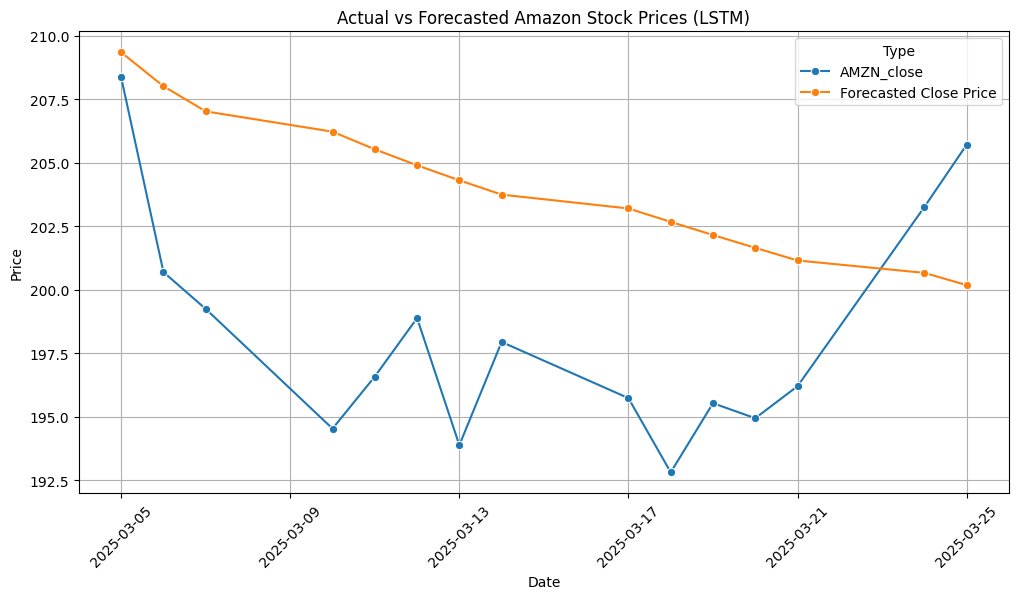

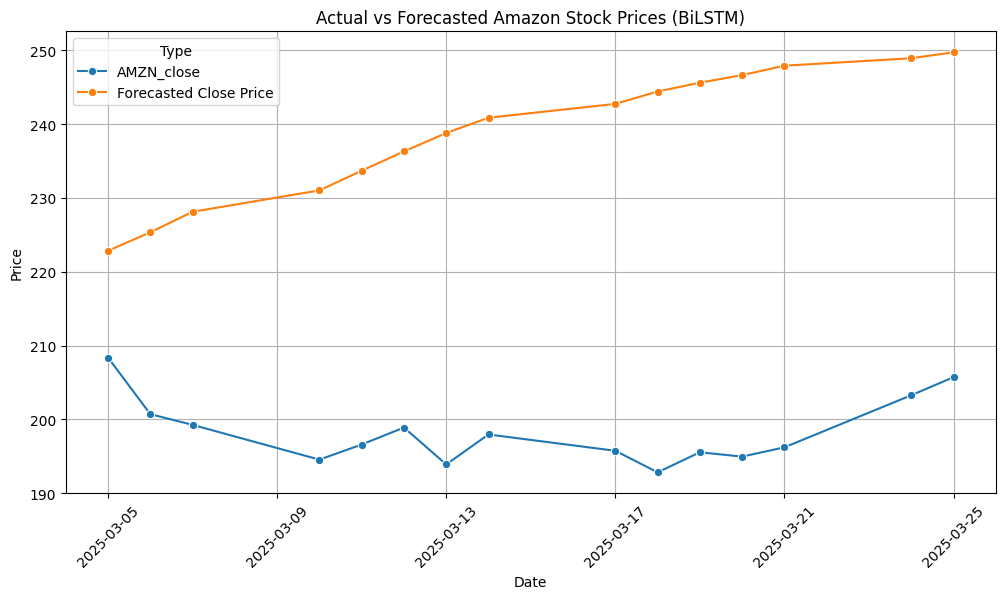

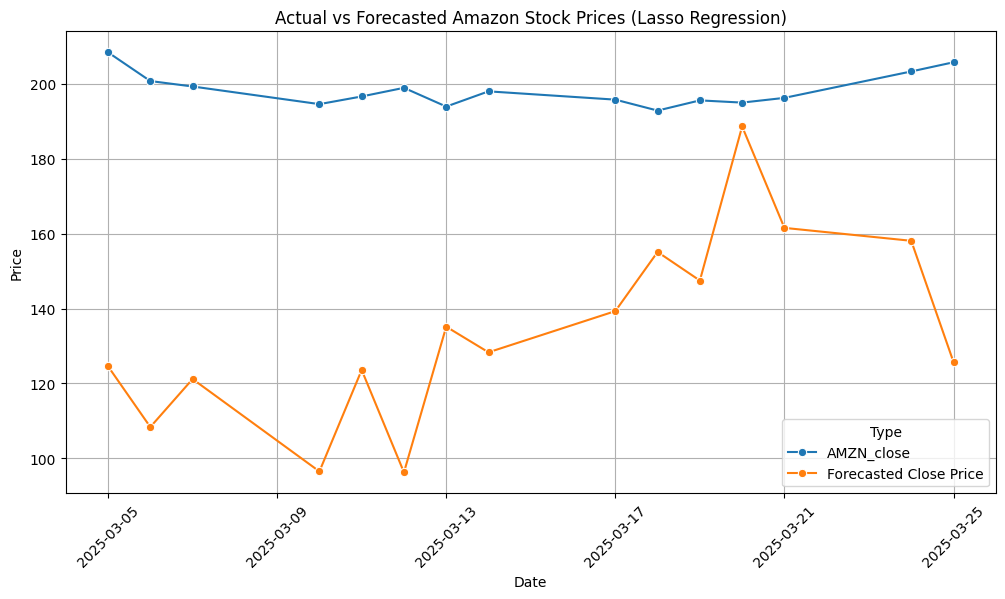

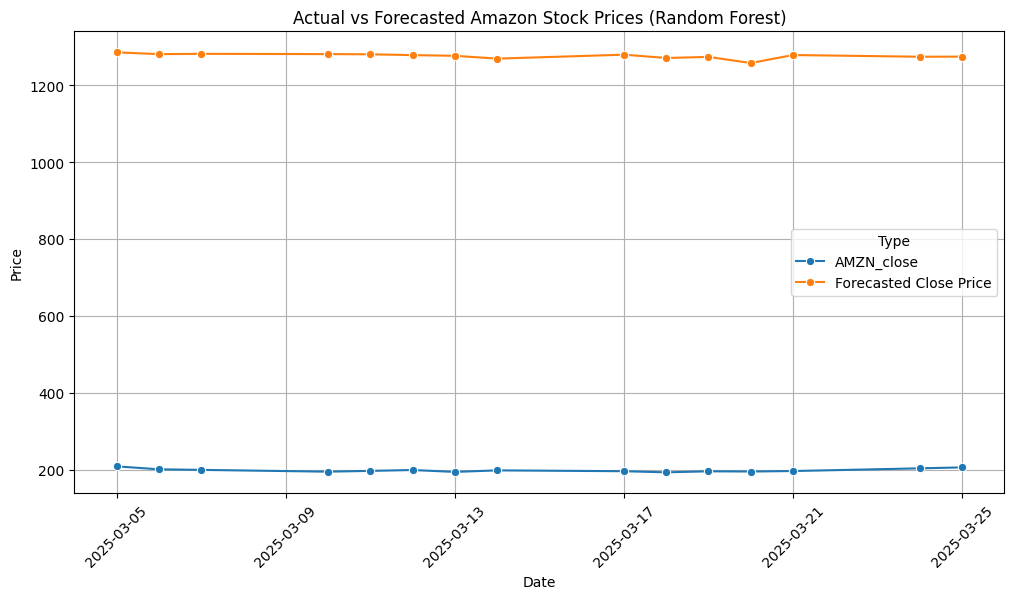

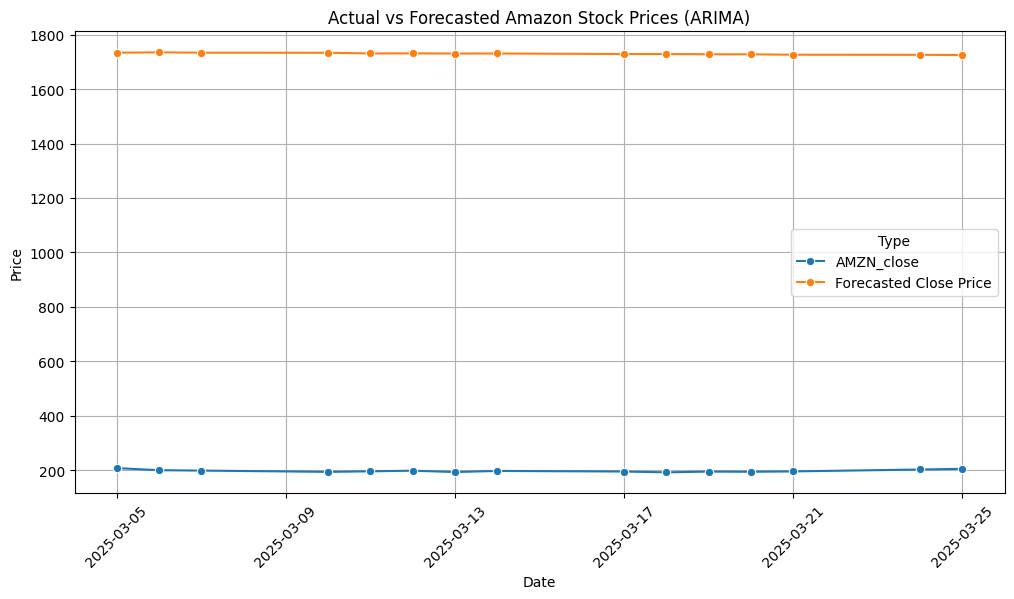

              Model  Pearson Correlation  Spearman Correlation         RMSE  \
0              LSTM             0.217733              0.142857     7.361995   
1            BiLSTM            -0.251346             -0.142857    41.909390   
2  Lasso Regression            -0.241101             -0.328571    69.281401   
3     Random Forest             0.349871              0.360714  1077.636755   
4             ARIMA             0.045094              0.132143  1531.431446   

           MAE        MAPE  
0     6.842141    3.475202  
1    40.557629   20.533656  
2    64.307179   32.333305  
3  1077.617631  543.725519  
4  1531.422710  772.712212  


In [71]:
# Load actual March prices
df_actual = pd.read_csv("/content/AMZN_march_prices.csv")

# Define models and their readable names
models = {
    "LSTM": lstm_amazon_forecast,
    "BiLSTM": bilstm_amazon_forecast,
    "Lasso Regression": lasso_amazon_forecast,
    "Random Forest": rf_amazon_forecast,
    "ARIMA": arima_amazon_forecast
}

results = []
for model_name, forecasted_df in models.items():
    df_eval = pd.concat([forecasted_df, df_actual['AMZN_close']], axis=1)

    # Compute metrics
    correlation, p_value = pearsonr(df_eval['Forecasted Close Price'], df_eval['AMZN_close'])
    spearman_corr, p_value_spear = spearmanr(df_eval['Forecasted Close Price'], df_eval['AMZN_close'])
    rmse = np.sqrt(np.mean((df_eval['AMZN_close'] - df_eval['Forecasted Close Price'])**2))
    mae = np.mean(np.abs(df_eval['AMZN_close'] - df_eval['Forecasted Close Price']))
    mape = np.mean(np.abs((df_eval['AMZN_close'] - df_eval['Forecasted Close Price']) / df_eval['AMZN_close'])) * 100


    results.append([model_name, correlation, spearman_corr, rmse, mae, mape])
    df_eval_melted = df_eval.melt(id_vars=['Date'],
                                  value_vars=['AMZN_close', 'Forecasted Close Price'],
                                  var_name='Type',
                                  value_name='Price')
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_eval_melted, x='Date', y='Price', hue='Type', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Actual vs Forecasted Amazon Stock Prices ({model_name})')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
results_df = pd.DataFrame(results, columns=['Model', 'Pearson Correlation', 'Spearman Correlation', 'RMSE', 'MAE', 'MAPE'])
print(results_df)